In [2]:


import pandas as pd

!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_telemetry.csv
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_errors.csv
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_maint.csv
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_failures.csv
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_machines.csv

telemetry = pd.read_csv('PdM_telemetry.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')



--2020-01-10 19:26:47--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_telemetry.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13.65.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80142329 (76M) [application/octet-stream]
Saving to: ‘PdM_telemetry.csv’

PdM_telemetry.csv   100%[===================>]  76.43M  1.29MB/s    in 68s     

2020-01-10 19:27:56 (1.13 MB/s) - ‘PdM_telemetry.csv’ saved [80142329/80142329]

--2020-01-10 19:27:56--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_errors.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13

In [3]:
# format datetime field which comes in as string | format="%Y-%m-%d %H:%M:%S"
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

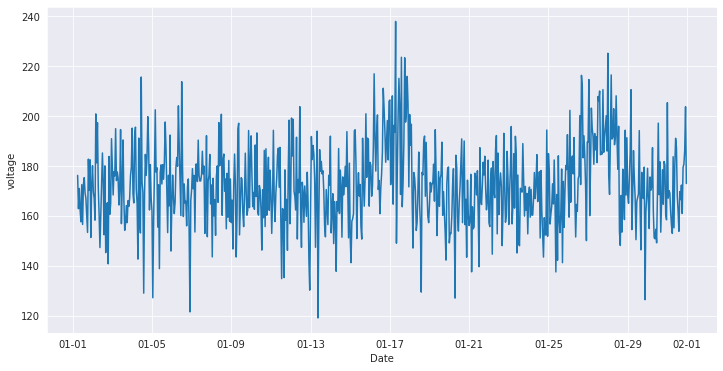

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

In [6]:


# format datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

print("Total number of error records: %d" % len(errors.index))
errors.head()



Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


Text(0, 0.5, 'Count')

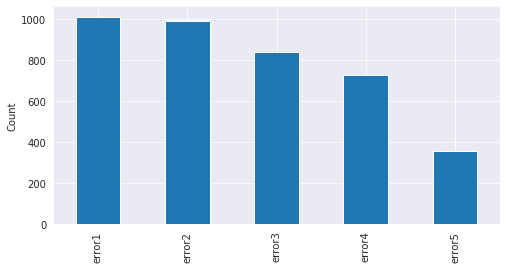

In [7]:
#check back plt
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [8]:
# format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()


Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


Text(0, 0.5, 'Count')

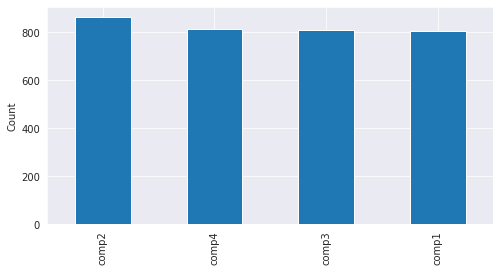

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [15]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


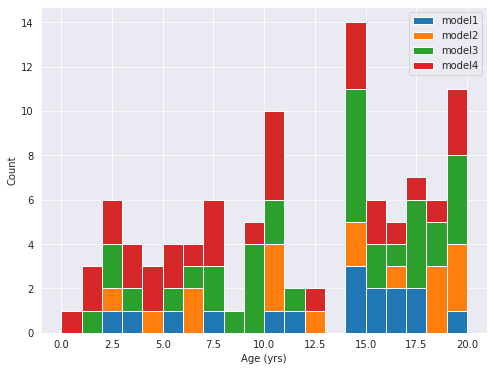

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [17]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()


Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


Text(0, 0.5, 'Count')

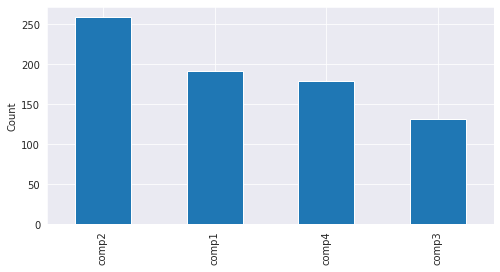

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [28]:


# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='mean').unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='std').unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()



/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [22]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,index='datetime',columns='machineID',values=col).rolling(window=24).mean().resample('3H',
closed='left',label='right',how='first').unstack())

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  """


In [29]:
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

In [30]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,index='datetime',columns='machineID',values=col).rolling(window=24).std().resample('3H',
closed='left',label='right',how='first').unstack())

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  """


In [31]:
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

In [32]:
telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884
5,1,2015-01-02 00:00:00,15.901952,36.129552,4.310741,9.390494
6,1,2015-01-02 03:00:00,6.884615,46.850076,9.205122,3.019906
7,1,2015-01-02 06:00:00,21.322735,48.770512,2.135684,10.037208
8,1,2015-01-02 09:00:00,18.952210,51.329636,13.789279,6.737739
9,1,2015-01-02 12:00:00,13.047080,13.702496,9.988609,1.639962


In [33]:


# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.ix[:, 2:6],
                            telemetry_mean_24h.ix[:, 2:6],
                            telemetry_sd_24h.ix[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()



/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional ind

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,13.299858,44.456335,8.885822,4.440660,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,6.966647,23.216421,4.656341,2.320066,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,0.025509,0.078991,0.027417,0.015278,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,8.027455,26.903567,5.370647,2.684308,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,12.495595,41.795700,8.345785,4.173854,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,17.689118,59.103715,11.789645,5.898997,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,58.444332,179.903039,35.659369,18.305595,27.664538,103.819404,28.654103,12.325783


In [34]:


telemetry_feat.head()



,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,21.322735,48.770512,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,18.952210,51.329636,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,13.047080,13.702496,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,16.642354,56.290447,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,17.424688,38.680380,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069


In [62]:
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,13.299858,44.456335,8.885822,4.440660,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,6.966647,23.216421,4.656341,2.320066,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,0.025509,0.078991,0.027417,0.015278,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,8.027455,26.903567,5.370647,2.684308,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,12.495595,41.795700,8.345785,4.173854,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,17.689118,59.103715,11.789645,5.898997,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,58.444332,179.903039,35.659369,18.305595,27.664538,103.819404,28.654103,12.325783


In [64]:
final = telemetry_feat.merge(machines, how='inner', left_on=['machineID'], right_on=['machineID'])

In [65]:
final.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,21.322735,48.770512,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,model3,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,18.952210,51.329636,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,model3,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,13.047080,13.702496,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,model3,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,16.642354,56.290447,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,model3,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,17.424688,38.680380,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,model3,18


In [66]:
final.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,13.299858,44.456335,8.885822,4.440660,14.918849,49.947916,10.046687,5.002065,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,6.966647,23.216421,4.656341,2.320066,2.260726,7.682126,1.713726,0.799820,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,0.025509,0.078991,0.027417,0.015278,6.380619,18.385248,4.145308,2.144863,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,8.027455,26.903567,5.370647,2.684308,13.358663,44.668824,8.924317,4.460347,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,12.495595,41.795700,8.345785,4.173854,14.853948,49.613807,9.921407,4.958594,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,17.689118,59.103715,11.789645,5.898997,16.394764,54.821318,10.980498,5.484480,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,58.444332,179.903039,35.659369,18.305595,27.664538,103.819404,28.654103,12.325783,20.000000


In [70]:
failures.head(762)

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
...,...,...,...
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1


In [71]:
failures['failure']=1

In [72]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,1
1,2015-03-06 06:00:00,1,1
2,2015-04-20 06:00:00,1,1
3,2015-06-19 06:00:00,1,1
4,2015-09-02 06:00:00,1,1


In [ ]:
final2 = final.merge(failures, how='inner', left_on=['machineID' and 'datetime'], right_on=['machineID' and 'datetime'])

In [82]:
failures['datetime']= pd.to_datetime(failures['datetime'])


In [83]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,1
1,2015-03-06 06:00:00,1,1
2,2015-04-20 06:00:00,1,1
3,2015-06-19 06:00:00,1,1
4,2015-09-02 06:00:00,1,1


In [84]:
failures['date']= failures['datetime'].dt.date 

In [85]:
failures.head()

,datetime,machineID,failure,date
0,2015-01-05 06:00:00,1,1,2015-01-05
1,2015-03-06 06:00:00,1,1,2015-03-06
2,2015-04-20 06:00:00,1,1,2015-04-20
3,2015-06-19 06:00:00,1,1,2015-06-19
4,2015-09-02 06:00:00,1,1,2015-09-02


In [86]:
final['date']= final['datetime'].dt.date

In [87]:
final.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,model,age,date
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,48.770512,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,model3,18,2015-01-02
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,51.329636,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,model3,18,2015-01-02
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,13.702496,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,model3,18,2015-01-02
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,56.290447,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,model3,18,2015-01-02
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,38.680380,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,model3,18,2015-01-02


In [88]:
final2 = final.merge(failures,how ='left', left_on=['machineID','date'], right_on=['machineID', 'date'])

In [89]:
final2.head()

,machineID,datetime_x,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,model,age,date,datetime_y,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,10.037208,11.233120,48.717395,10.079880,5.853209,model3,18,2015-01-02,NaT,NaN
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,6.737739,12.519402,48.385076,10.171540,6.163231,model3,18,2015-01-02,NaT,NaN
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,1.639962,13.370357,42.432317,9.471669,6.195076,model3,18,2015-01-02,NaT,NaN
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,8.854145,13.299281,41.346121,8.731229,5.687944,model3,18,2015-01-02,NaT,NaN
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,3.060781,13.954518,43.490234,8.061653,5.898069,model3,18,2015-01-02,NaT,NaN


In [91]:
final2 = final2.drop('datetime_y', axis=1)

In [92]:
final2.head()

,machineID,datetime_x,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,model,age,date,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,model3,18,2015-01-02,NaN
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,model3,18,2015-01-02,NaN
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,model3,18,2015-01-02,NaN
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,model3,18,2015-01-02,NaN
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,model3,18,2015-01-02,NaN


In [93]:
final2.loc[final2['failure']!=1, 'failure']=0

In [94]:
final2.head(20)

,machineID,datetime_x,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,model,age,date,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,model3,18,2015-01-02,0.0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,model3,18,2015-01-02,0.0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,model3,18,2015-01-02,0.0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,model3,18,2015-01-02,0.0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,model3,18,2015-01-02,0.0
5,1,2015-01-02 21:00:00,163.278466,446.493166,104.387585,38.068116,21.580492,41.380958,20.725597,6.932127,...,20.725597,6.932127,14.402740,42.626186,10.408012,5.941890,model3,18,2015-01-02,0.0
6,1,2015-01-03 00:00:00,172.191198,434.214692,93.747282,39.716482,16.369836,14.636041,18.817326,3.426997,...,18.817326,3.426997,15.513819,40.395881,10.833294,5.737671,model3,18,2015-01-03,0.0
7,1,2015-01-03 03:00:00,175.210027,504.845430,108.512153,37.763933,5.991921,16.062702,6.382608,3.449468,...,6.382608,3.449468,15.726970,39.648116,11.904700,5.601191,model3,18,2015-01-03,0.0
8,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,2.177029,7.670520,15.635083,41.828592,11.326412,5.583521,model3,18,2015-01-03,0.0
9,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,5.230039,2.687565,13.995465,40.843882,11.036546,5.561553,model3,18,2015-01-03,0.0


In [95]:
final2['failure'].value_counts()

0.0    285594
1.0      6046
Name: failure, dtype: int64

In [121]:
final2.to_csv('final_predictive_maintenance.csv')

KeyboardInterrupt: 

In [97]:
final2['model']= final2['model'].astype('category')

In [27]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291640 entries, 0 to 291639
Data columns (total 23 columns):
Unnamed: 0           291640 non-null int64
machineID            291640 non-null int64
datetime_x           291640 non-null object
voltmean_3h          291640 non-null float64
rotatemean_3h        291640 non-null float64
pressuremean_3h      291640 non-null float64
vibrationmean_3h     291640 non-null float64
voltsd_3h            291640 non-null float64
rotatesd_3h          291640 non-null float64
pressuresd_3h        291640 non-null float64
vibrationsd_3h       291640 non-null float64
voltmean_24h         291640 non-null float64
rotatemean_24h       291640 non-null float64
pressuremean_24h     291640 non-null float64
vibrationmean_24h    291640 non-null float64
voltsd_24h           291640 non-null float64
rotatesd_24h         291640 non-null float64
pressuresd_24h       291640 non-null float64
vibrationsd_24h      291640 non-null float64
model                291640 non-null ob

In [123]:
final2['model'].dtype

dtype('O')

In [122]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
final2_model = ordinal_enc.fit_transform( final2[['model']] )

In [143]:
final2_model

array([[2.],
       [2.],
       [2.],
       ...,
       [3.],
       [3.],
       [3.]])

In [144]:
transformed = pd.DataFrame(final2_model)

In [145]:
final3 = final2.drop(labels =['Unnamed: 0'], axis = 1)

In [146]:
final3 = pd.concat([final2, transformed], axis=1).drop(['model'],axis=1)

In [147]:
final3.rename( columns={0:'model_enc'} , inplace=True)

In [148]:
final3.head()

,Unnamed: 0,machineID,datetime_x,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,...,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,date,failure,model_enc
0,0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,...,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,18,2015-01-02,0.0,2.0
1,1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,...,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,18,2015-01-02,0.0,2.0
2,2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,...,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,18,2015-01-02,0.0,2.0
3,3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,...,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,18,2015-01-02,0.0,2.0
4,4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,...,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,18,2015-01-02,0.0,2.0


In [149]:
final3.drop(labels =['Unnamed: 0'], axis = 1, inplace=True)

In [150]:
final3.drop(labels =['date'], axis = 1, inplace=True)

In [151]:
final3.head()

,machineID,datetime_x,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,failure,model_enc
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,48.770512,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,18,0.0,2.0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,51.329636,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,18,0.0,2.0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,13.702496,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,18,0.0,2.0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,56.290447,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,18,0.0,2.0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,38.680380,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,18,0.0,2.0


In [152]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [153]:
final3.head()

,machineID,datetime_x,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,failure,model_enc
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,48.770512,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,18,0.0,2.0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,51.329636,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,18,0.0,2.0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,13.702496,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,18,0.0,2.0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,56.290447,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,18,0.0,2.0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,38.680380,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,18,0.0,2.0


In [154]:
final3['datetime_x'].value_counts()

2015-01-24 00:00:00    102
2015-04-20 15:00:00    102
2015-04-20 03:00:00    102
2015-04-20 06:00:00    102
2015-01-24 15:00:00    102
                      ... 
2015-01-13 09:00:00    100
2015-08-20 18:00:00    100
2015-04-16 00:00:00    100
2015-08-05 06:00:00    100
2015-03-27 21:00:00    100
Name: datetime_x, Length: 2913, dtype: int64

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [156]:
df_model = final3['failure']
df_model = pd.DataFrame(df_model, columns = ['failure'])

final3.drop( labels = ['failure'], axis=1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(final3, df_model, test_size= 0.3, random_state=42, shuffle=False)

In [157]:
df_model

,failure
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
291635,0.0
291636,0.0
291637,0.0
291638,0.0


In [158]:
X_train.shape

(204148, 20)

In [159]:
y_train['failure'].value_counts()

0.0    200106
1.0      4042
Name: failure, dtype: int64

In [160]:
X_train.head()

,machineID,datetime_x,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,21.322735,48.770512,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,18,2.0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,18.952210,51.329636,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,18,2.0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,13.047080,13.702496,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,18,2.0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,16.642354,56.290447,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,18,2.0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,17.424688,38.680380,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,18,2.0


In [161]:
X_train.index = X_train['datetime_x']
X_train.drop(labels = ['datetime_x'], axis=1, inplace=True)
X_train.head(10)

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
datetime_x,,,,,,,,,,,,,,,,,,,
2015-01-02 06:00:00,1,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,21.322735,48.770512,2.135684,10.037208,11.233120,48.717395,10.079880,5.853209,18,2.0
2015-01-02 09:00:00,1,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,18.952210,51.329636,13.789279,6.737739,12.519402,48.385076,10.171540,6.163231,18,2.0
2015-01-02 12:00:00,1,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,13.047080,13.702496,9.988609,1.639962,13.370357,42.432317,9.471669,6.195076,18,2.0
2015-01-02 15:00:00,1,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,16.642354,56.290447,3.305739,8.854145,13.299281,41.346121,8.731229,5.687944,18,2.0
2015-01-02 18:00:00,1,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,17.424688,38.680380,9.105775,3.060781,13.954518,43.490234,8.061653,5.898069,18,2.0
2015-01-02 21:00:00,1,163.278466,446.493166,104.387585,38.068116,21.580492,41.380958,20.725597,6.932127,21.580492,41.380958,20.725597,6.932127,14.402740,42.626186,10.408012,5.941890,18,2.0
2015-01-03 00:00:00,1,172.191198,434.214692,93.747282,39.716482,16.369836,14.636041,18.817326,3.426997,16.369836,14.636041,18.817326,3.426997,15.513819,40.395881,10.833294,5.737671,18,2.0
2015-01-03 03:00:00,1,175.210027,504.845430,108.512153,37.763933,5.991921,16.062702,6.382608,3.449468,5.991921,16.062702,6.382608,3.449468,15.726970,39.648116,11.904700,5.601191,18,2.0
2015-01-03 06:00:00,1,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,11.514450,47.880443,2.177029,7.670520,15.635083,41.828592,11.326412,5.583521,18,2.0


In [162]:
scaler = StandardScaler()
X_train1 = X_train.copy()
X_train1 = scaler.fit_transform(X_train1)
indexes = X_train.index
columns = X_train.columns
X_train1 = pd.DataFrame(X_train1)
X_train1.index = indexes
X_train1.columns = columns
X_train1

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
datetime_x,,,,,,,,,,,,,,,,,,,
2015-01-02 06:00:00,-1.707165,0.983131,-0.179651,-0.903849,0.334942,1.150538,0.186053,-1.447730,2.411173,1.150538,0.186053,-1.447730,2.411173,-1.626514,-0.159902,0.024439,1.059451,1.246715,0.133703
2015-01-02 09:00:00,-1.707165,0.586650,-0.217662,0.100369,-1.229808,0.810614,0.296406,1.053513,0.989105,0.810614,0.296406,1.053513,0.989105,-1.059353,-0.203176,0.078083,1.446234,1.246715,0.133703
2015-01-02 12:00:00,-1.707165,-1.094124,-0.669575,-0.164320,-1.232952,-0.036158,-1.326125,0.237764,-1.208033,-0.036158,-1.326125,0.237764,-1.208033,-0.684142,-0.978329,-0.331519,1.485963,1.246715,0.133703
2015-01-02 15:00:00,-1.707165,-0.033063,-0.109417,0.212417,0.027925,0.479390,0.510323,-1.196598,1.901274,0.479390,0.510323,-1.196598,1.901274,-0.715481,-1.119771,-0.764864,0.853268,1.246715,0.133703
2015-01-02 18:00:00,-1.707165,-0.791281,0.675873,0.259283,0.154002,0.591574,-0.249046,0.048280,-0.595661,0.591574,-0.249046,0.048280,-0.595661,-0.426567,-0.840570,-1.156736,1.115419,1.246715,0.133703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-30 18:00:00,1.708120,0.626365,-0.328274,-0.644801,-0.018763,-0.906015,-0.564061,1.263437,0.452294,-0.906015,-0.564061,1.263437,0.452294,0.233431,-0.688457,1.282895,-0.317040,-0.360073,0.133703
2015-12-30 21:00:00,1.708120,0.352179,0.106148,-1.788001,-0.385021,0.193157,1.149666,-0.409681,-0.322850,0.193157,1.149666,-0.409681,-0.322850,0.198146,-0.716971,1.314937,1.199677,-0.360073,0.133703
2015-12-31 00:00:00,1.708120,0.190351,-2.342935,-0.350240,0.076698,-0.521494,0.398537,0.035980,-0.237377,-0.521494,0.398537,0.035980,-0.237377,0.229746,0.654334,1.597886,1.502227,-0.360073,0.133703


In [163]:
X_test.index = X_test['datetime_x']
X_test.drop(labels = ['datetime_x'],axis=1, inplace=True)
X_test.head(10)

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
datetime_x,,,,,,,,,,,,,,,,,,,
2015-12-31 09:00:00,70,172.235775,440.104182,96.821799,40.958674,7.084321,29.809266,3.841973,3.446680,7.084321,29.809266,3.841973,3.446680,16.055930,58.538450,12.296786,6.163628,9,2.0
2015-12-31 12:00:00,70,156.962192,424.373753,94.524302,39.522927,2.294875,51.287423,9.776702,4.803954,2.294875,51.287423,9.776702,4.803954,15.561630,54.478239,12.307472,4.771709,9,2.0
2015-12-31 15:00:00,70,162.626063,436.143633,102.188026,39.067958,4.837156,44.837862,6.314071,1.386739,4.837156,44.837862,6.314071,1.386739,12.765374,56.032734,10.394884,4.512736,9,2.0
2015-12-31 18:00:00,70,169.920912,515.086990,112.671823,42.292951,19.967992,54.440730,2.851381,0.887555,19.967992,54.440730,2.851381,0.887555,13.170912,56.746963,9.082795,4.122998,9,2.0
2015-12-31 21:00:00,70,168.739802,487.061016,91.948447,37.863581,8.030341,73.516718,10.239921,5.849065,8.030341,73.516718,10.239921,5.849065,13.661223,59.359868,9.631426,4.203579,9,2.0
2016-01-01 00:00:00,70,155.975184,469.100640,102.851680,47.011505,24.061272,95.000352,19.080510,4.733470,24.061272,95.000352,19.080510,4.733470,13.684732,57.994109,9.162313,4.005692,9,2.0
2016-01-01 03:00:00,70,179.057600,479.723212,95.068043,42.701396,11.099093,36.165134,5.408608,2.240395,11.099093,36.165134,5.408608,2.240395,15.229569,59.673214,10.489853,4.966499,9,2.0
2016-01-01 06:00:00,70,171.365951,448.442399,98.835236,43.955487,4.629856,57.468039,16.654056,1.401570,4.629856,57.468039,16.654056,1.401570,15.647788,58.009806,10.300287,4.906594,9,2.0
2015-01-02 06:00:00,71,184.910640,421.949305,93.645624,43.641498,11.827398,11.187198,2.191895,4.139865,11.827398,11.187198,2.191895,4.139865,12.286834,45.981120,9.853264,4.243684,18,1.0


In [164]:
X_test1 = X_test.copy()
X_test1 = scaler.fit_transform(X_test1)
X_test1 = pd.DataFrame(X_test1)
indexes = X_test.index
X_test1.index = indexes
X_test1.columns = columns
X_test1.head(10)

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
datetime_x,,,,,,,,,,,,,,,,,,,
2015-12-31 09:00:00,-1.790720,0.156093,-0.197295,-0.553548,0.163851,-0.894505,-0.629190,-1.086970,-0.426646,-0.894505,-0.629190,-1.086970,-0.426646,0.508181,1.112321,1.284841,1.458392,-0.490223,0.235992
2015-12-31 12:00:00,-1.790720,-1.452934,-0.670684,-0.860187,-0.248987,-1.583382,0.293544,0.188676,0.158199,-1.583382,0.293544,0.188676,0.158199,0.288077,0.585266,1.291008,-0.286036,-0.490223,0.235992
2015-12-31 15:00:00,-1.790720,-0.856262,-0.316483,0.162661,-0.379810,-1.217720,0.016461,-0.555603,-1.314266,-1.217720,0.016461,-0.555603,-1.314266,-0.957050,0.787055,0.187289,-0.610596,-0.490223,0.235992
2015-12-31 18:00:00,-1.790720,-0.087771,2.059222,1.561894,0.547513,0.958584,0.429015,-1.299894,-1.529363,0.958584,0.429015,-1.299894,-1.529363,-0.776470,0.879769,-0.569893,-1.099035,-0.490223,0.235992
2015-12-31 21:00:00,-1.790720,-0.212197,1.215814,-1.203976,-0.726119,-0.758437,1.248548,0.288243,0.608533,-0.758437,1.248548,0.288243,0.608533,-0.558143,1.218949,-0.253289,-0.998048,-0.490223,0.235992
2016-01-01 00:00:00,-1.790720,-1.556912,0.675318,0.251237,1.904297,1.547330,2.171517,2.188492,0.127828,1.547330,2.171517,2.188492,0.127828,-0.547675,1.041661,-0.524005,-1.246051,-0.490223,0.235992
2016-01-01 03:00:00,-1.790720,0.874753,0.994992,-0.787616,0.664958,-0.317051,-0.356132,-0.750228,-0.946429,-0.317051,-0.356132,-0.750228,-0.946429,0.140216,1.259625,0.242094,-0.041915,-0.490223,0.235992
2016-01-01 06:00:00,-1.790720,0.064460,0.053633,-0.284823,1.025562,-1.247536,0.559072,1.666936,-1.307876,-1.247536,0.559072,1.666936,-1.307876,0.326442,1.043698,0.132699,-0.116991,-0.490223,0.235992
2015-01-02 06:00:00,-1.675201,1.491354,-0.743644,-0.977460,0.935277,-0.212297,-1.429221,-1.441648,-0.127955,-0.212297,-1.429221,-1.441648,-0.127955,-1.170136,-0.517743,-0.125270,-0.947786,0.947268,-0.774699


In [165]:
from tensorflow import keras
X_train.shape[1:]

(19,)

In [166]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

In [167]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',metrics=['accuracy'])

In [168]:
history = model.fit( X_train, y_train, epochs=5 )

Train on 204148 samples
Epoch 1/5
204148/204148 [==============================] - 24s 120us/sample - loss: 0.3205 - accuracy: 0.9801
Epoch 2/5
204148/204148 [==============================] - 24s 118us/sample - loss: 0.3191 - accuracy: 0.9802
Epoch 3/5
204148/204148 [==============================] - 24s 119us/sample - loss: 0.3191 - accuracy: 0.9802
Epoch 4/5
204148/204148 [==============================] - 24s 118us/sample - loss: 0.3191 - accuracy: 0.9802
Epoch 5/5
204148/204148 [==============================] - 24s 119us/sample - loss: 0.3191 - accuracy: 0.9802


In [169]:
model.evaluate(X_test,y_test)

87492/87492 [==============================] - 6s 67us/sample - loss: 0.3692 - accuracy: 0.9771


[0.3691842971894274, 0.97709507]

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(19,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

In [90]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',metrics=['accuracy'])

In [91]:
history = model.fit( X_train, y_train, epochs=5 )

Train on 204148 samples
Epoch 1/5
204148/204148 [==============================] - 24s 117us/sample - loss: 0.3193 - accuracy: 0.9801
Epoch 2/5
204148/204148 [==============================] - 25s 122us/sample - loss: 0.3191 - accuracy: 0.9802
Epoch 3/5
204148/204148 [==============================] - 27s 132us/sample - loss: 0.3191 - accuracy: 0.9802
Epoch 4/5
204148/204148 [==============================] - 24s 120us/sample - loss: 0.3191 - accuracy: 0.9802
Epoch 5/5
204148/204148 [==============================] - 25s 125us/sample - loss: 0.3191 - accuracy: 0.9802


In [92]:
model.evaluate(X_test,y_test)

87492/87492 [==============================] - 6s 70us/sample - loss: 0.3692 - accuracy: 0.9771


[0.3691842971894274, 0.97709507]

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(19,activation='relu',input_shape=X_train1.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

history = model.fit( X_train1, y_train, epochs=5 )

model.evaluate(X_test1,y_test)

Train on 204148 samples
Epoch 1/5
204148/204148 [==============================] - 24s 119us/sample - loss: 0.1073 - accuracy: 0.9799
Epoch 2/5
204148/204148 [==============================] - 25s 123us/sample - loss: 0.0953 - accuracy: 0.9802
Epoch 3/5
204148/204148 [==============================] - 24s 120us/sample - loss: 0.0929 - accuracy: 0.9802
Epoch 4/5
204148/204148 [==============================] - 24s 118us/sample - loss: 0.0915 - accuracy: 0.9802
Epoch 5/5
87492/87492 [==============================] - 6s 73us/sample - loss: 0.1035 - accuracy: 0.9771


[0.10353689753202092, 0.97709507]

In [96]:
model = keras.models.Sequential([
    keras.layers.Dense(32,activation='relu',input_shape=X_train1.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

history = model.fit( X_train1, y_train, epochs=5 )

model.evaluate(X_test1,y_test)

Train on 204148 samples
Epoch 1/5
204148/204148 [==============================] - 25s 120us/sample - loss: 0.1050 - accuracy: 0.9785
Epoch 2/5
204148/204148 [==============================] - 25s 123us/sample - loss: 0.0941 - accuracy: 0.9802
Epoch 3/5
204148/204148 [==============================] - 26s 125us/sample - loss: 0.0918 - accuracy: 0.9802
Epoch 4/5
204148/204148 [==============================] - 25s 122us/sample - loss: 0.0902 - accuracy: 0.9802
Epoch 5/5
87492/87492 [==============================] - 6s 72us/sample - loss: 0.1014 - accuracy: 0.9771


[0.10143846995709245, 0.9770836]

In [98]:
model = keras.models.Sequential([
    keras.layers.Dense(32,activation='relu',input_shape=X_train1.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

history = model.fit( X_train1, y_train, epochs=5 )

model.evaluate(X_test1,y_test)

SyntaxError: positional argument follows keyword argument (<ipython-input-98-4984cf4b2437>, line 2)

In [170]:
model = keras.models.Sequential([
    keras.layers.Dense(32,activation='relu',input_shape=X_train1.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit( X_train1, y_train, epochs=5 )

model.evaluate(X_test1,y_test)

Train on 204148 samples
Epoch 1/5
204148/204148 [==============================] - 27s 132us/sample - loss: 0.0973 - accuracy: 0.9787
Epoch 2/5
204148/204148 [==============================] - 26s 129us/sample - loss: 0.0870 - accuracy: 0.9802
Epoch 3/5
204148/204148 [==============================] - 26s 130us/sample - loss: 0.0856 - accuracy: 0.9802
Epoch 4/5
204148/204148 [==============================] - 27s 132us/sample - loss: 0.0848 - accuracy: 0.9802
Epoch 5/5
87492/87492 [==============================] - 6s 68us/sample - loss: 0.1006 - accuracy: 0.9770


[0.1005728289174835, 0.9769693]

In [171]:
model = keras.models.Sequential([
    keras.layers.Dense(40,activation='relu',input_shape=X_train1.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

history = model.fit( X_train1, y_train, epochs=5 )

model.evaluate(X_test1,y_test)

Train on 204148 samples
Epoch 1/5
204148/204148 [==============================] - 26s 126us/sample - loss: 0.1027 - accuracy: 0.9792
Epoch 2/5
204148/204148 [==============================] - 26s 129us/sample - loss: 0.0922 - accuracy: 0.9802
Epoch 3/5
204148/204148 [==============================] - 26s 127us/sample - loss: 0.0900 - accuracy: 0.9802
Epoch 4/5
204148/204148 [==============================] - 26s 127us/sample - loss: 0.0885 - accuracy: 0.9802
Epoch 5/5
87492/87492 [==============================] - 6s 72us/sample - loss: 0.1005 - accuracy: 0.9771


[0.1004603287068082, 0.97710645]

In [173]:
model = keras.models.Sequential([
    keras.layers.Dense(42,activation='relu',input_shape=X_train1.shape[1:]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

history = model.fit( X_train1, y_train, epochs=5 )

model.evaluate(X_test1,y_test)

Train on 204148 samples
Epoch 1/5
204148/204148 [==============================] - 26s 128us/sample - loss: 0.1016 - accuracy: 0.9802
Epoch 2/5
204148/204148 [==============================] - 26s 129us/sample - loss: 0.0937 - accuracy: 0.9802
Epoch 3/5
204148/204148 [==============================] - 26s 127us/sample - loss: 0.0913 - accuracy: 0.9802
Epoch 4/5
204148/204148 [==============================] - 26s 128us/sample - loss: 0.0897 - accuracy: 0.9802
Epoch 5/5
87492/87492 [==============================] - 6s 74us/sample - loss: 0.1015 - accuracy: 0.9771


[0.10153953910690791, 0.97709507]